# **2 - N-gramas, TF-IDF e Uso de Redes Neurais**

>**Nanodegree 1: Natural Language Processing `NLP`**

## 2.1 N-gram
## 2.2 TF-IDF

## **Sentiment Analyzer**

- Now, we will use the [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) function in our project:


[artificial-intelligence-data-sci](https://github.com/AngelOttoni/artificial-intelligence-data-sci.git)

### **Movie Review Dataset**

- The IMDB dataset contains 50 thousand movie reviews and is used for binary sentiment classification (positive and negative).


  1. Access the [IMDB](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) dataset, which contains 50,000 movie reviews.  
  2. Use the `Pandas` `Python` package, to analyze this dataset.
    - To do so, open [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true).  



- In this hands-on, we will cover techniques for performing **text classification**.
- To do this, we will use a dataset of films.

In [ ]:
#Import Pandas using:
import pandas as pd

In [ ]:
# Read the CSV file from the Google Drive link
url = 'https://drive.google.com/u/0/uc?id=1ZlZsxrMHhZZb9ZTYABOiWw7bCPofY6cz&export=download'
df = pd.read_csv(url, header=0)

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


- **Checks whether there are null values in the dataset:**

In [ ]:
# Count the number of missing (null) values in each column of the DataFrame 'df'
df.isnull().sum()

review       0
sentiment    0
dtype: int64

- **Next, let's check the number of positive and negative examples:**

In [ ]:
# Count the occurrences of unique values in the 'sentiment' column of the DataFrame 'df'
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

- **As we can see above, the classes are balanced, with 25,000 examples for each class.**
- **Let's plot this relationship:**

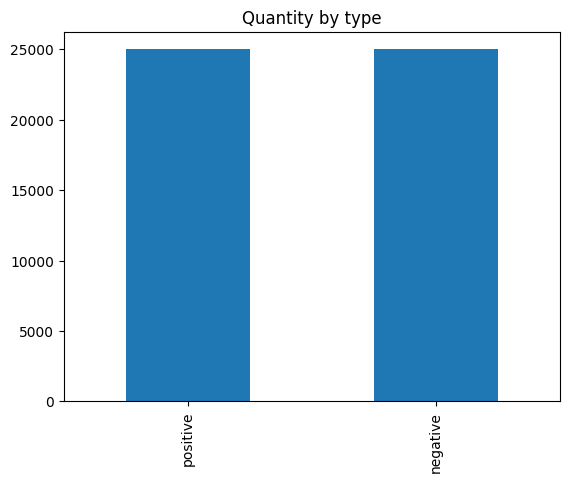

In [ ]:
# Generate a bar plot to visualize the quantity of each unique value in the 'sentiment' column
# Set the plot title to "Quantity by type" and rotate the x-axis labels by 90 degrees
df['sentiment'].value_counts().plot.bar(title="Quantity by type",rot=90);

## **Text preprocessing with `NLTK`**

- The pre-processing step is very important to create adequate and effective **`PLN`** models.
- Therefore, our goal now is to start this pre-processing.
- Now that you know your dataset a little, import the [`Python NLTK library`](https://www.nltk.org/) and pre-process the text.

In [ ]:
# Install the Natural Language Toolkit (NLTK) library using pip
!pip install nltk

In [ ]:
# Import the Natural Language Toolkit (NLTK) library
import nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- **Next, let's print the first example of our dataset:**

In [ ]:
# Extract the text of the first 'review' in the DataFrame 'df'
example = df['review'].values[0]
print(example)
print(len(example.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

- **We will remove punctuations, stopwords and perform word counting:**

In [ ]:
# Import the 'string' module
import string

In [ ]:
# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

In [ ]:
# Define a function for initial text preparation
def initial_preparation(text):
# Tokenize the text into words using NLTK's word_tokenize
  words = [
      i for i in word_tokenize(text, language='english')
      if i not in punctuations]
  words = [
      i for i in words if i not in stop_words
  ]
  return words

In [ ]:
# Apply initial text preparation to the 'example' text
prepared_example = initial_preparation(example)
print(prepared_example)
print(len(prepared_example))

['One', 'reviewers', 'mentioned', 'watching', '1', 'Oz', 'episode', "'ll", 'hooked', 'They', 'right', 'exactly', 'happened', 'me.', 'br', 'br', 'The', 'first', 'thing', 'struck', 'Oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'GO', 'Trust', 'show', 'faint', 'hearted', 'timid', 'This', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'Its', 'hardcore', 'classic', 'use', 'word.', 'br', 'br', 'It', 'called', 'OZ', 'nickname', 'given', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'Emerald', 'City', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'Em', 'City', 'home', 'many', '..', 'Aryans', 'Muslims', 'gangstas', 'Latinos', 'Christians', 'Italians', 'Irish', '....', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away.', 'br', 'br', 'I', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 

- Now, we went from **307** to **196** tokens.
- Note that there are some very small words (with just one letter), as well as some words that we can ignore.
- So let's create an additional function to remove them.

- Furthermore, we will use a technique called [stemming](https://www.geeksforgeeks.org/introduction-to-stemming/).
  - **Stemming** is the technique of removing suffixes and prefixes from a word, called **stemming**.
  - For example, the stem of the word cooking is cook.
  - A good algorithm knows that "ing" is a suffix and can be removed.
  - **Stemming** is widely used in search engines for indexing words.
  - Let's use **stemming** to further simplify our problem, removing word variations.

  [`SnowballStemmer`](https://www.nltk.org/_modules/nltk/stem/snowball.html)

In [ ]:
# Import the SnowballStemmer from NLTK's stem module
from nltk.stem import SnowballStemmer

# Create an instance of the SnowballStemmer for the English language
stemmer = SnowballStemmer('english')

In [ ]:
# Define the minimum length for words to be retained
MIN_LEN = 1

# Define a list of words to be ignored during text processing
IGNORE = ['..', '...', '....', 'br','.so','\'ll']

In [ ]:
# Define a function for further text preparation
def prep(text):
  words = [
      i for i in word_tokenize(text, language='english') if i not in punctuations
  ]
  words = [
      i for i in words if i not in stop_words
  ]
  words = [
      i for i in words if len(i) > MIN_LEN
  ]
  words = [
      i for i in words if i not in IGNORE
  ]
  words = [
      stemmer.stem(i) for i in words
  ]
  return words

In [ ]:
# Apply further text preparation to the 'example' text
prepared_example = prep(example)
print(prepared_example)
print(len(prepared_example))

['one', 'review', 'mention', 'watch', 'oz', 'episod', 'hook', 'they', 'right', 'exact', 'happen', 'me.', 'the', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'this', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'it', 'hardcor', 'classic', 'use', 'word.', 'it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'it', 'focus', 'main', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'would', "n't", 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'charm', 'forget

- **Thus, we reduced from 196 to 176 tokens.**
- **Now that we've tested the function, let's run this preparation function on the review column of our dataset and then put the text back together so that it becomes a sentence again, not a list of words.**
- **As the function may take time, we will use the `%%time` directive to show us the processing time.**

In [ ]:
# Measure the execution time of the following code cell
%%time
# Apply the 'prep' function to the 'review' column of the DataFrame and join the results
df['review2'] = df['review'].apply(prep)
df['review2'] = df['review2'].apply(' '.join)

CPU times: user 3min 45s, sys: 1.34 s, total: 3min 46s
Wall time: 4min 52s


In [ ]:
# Display the first few rows of the DataFrame
df.head()

,review,sentiment,review2
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook they r...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product the film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic 's famili littl boy jake think 's zombi ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visual ...


- Ready! We can now start using a **machine learning algorithm** to try to classify our examples.

- Let's first separate the training and test data, with 20% for the test data.

- To do this, we will use the function [**`train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
# - 'df['review2']' represents the feature (X) data, and 'df['sentiment']' represents the target (y) data
# - 'test_size=0.2' specifies that 20% of the data will be used for testing, while 80% will be for training
# - 'random_state=0' sets a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(df['review2'], df['sentiment'], test_size=0.2, random_state=0)

# Print the shapes (dimensions) of the training and testing sets
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)


# **TF-IDF**



In [ ]:
# Import the TfidfVectorizer class from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

- **[`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) is used to convert text data into `TF-IDF` (T*erm Frequency-Inverse Document Frequency*) vector representations, which are commonly used in natural language processing and information retrieval tasks.**

- **Notice that, in the code below, we are limiting the number of features to 100,000 and allowing the creation of unigram, bigram and trigram.**
- **The advantage is that we select only the 100,000 most significant n-grams, according to TF-IDF.**

In [ ]:
MAX_FEATURES = 100000

In [ ]:
# Measure the execution time for the following TF-IDF vectorization process
%%time

# Create a TfidfVectorizer object 'tfidf' for feature extraction
# - 'strip_accents='unicode'' specifies to strip accents using Unicode encoding
# - 'ngram_range=(1, 3)' specifies that unigrams (1-word), bigrams (2-words), and trigrams (3-words) will be considered as features
# - 'max_features=MAX_FEATURES' limits the maximum number of features (vocabulary size)
tfidf = TfidfVectorizer(strip_accents='unicode', ngram_range=(1, 3), max_features=MAX_FEATURES)

# Fit and transform the training data 'X_train' into a TF-IDF vector representation
tfidf_X_train = tfidf.fit_transform(X_train)

# Transform the testing data 'X_test' into a TF-IDF vector representation using the same 'tfidf' object
tfidf_X_test = tfidf.transform(X_test)

CPU times: user 1min 13s, sys: 2.41 s, total: 1min 16s
Wall time: 1min 16s


In [ ]:
# Print the shape (dimensions) of the TF-IDF matrix for the training data
print('tfidf_X_train shape:', tfidf_X_train.shape)

# Print the shape (dimensions) of the TF-IDF matrix for the testing data
print('tfidf_X_test shape:', tfidf_X_test.shape)

tfidf_X_train shape: (40000, 100000)
tfidf_X_test shape: (10000, 100000)


- As the sentiment values are **"positive"** and **"negative"**, we need to encode them in a format that can be used in **machine learning** models.

- Let's then create `one-hot-encoding` for these values, with the function [`LabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

In [ ]:
# Import the LabelBinarizer class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelBinarizer

# Create an instance of the LabelBinarizer class
lb = LabelBinarizer()

# Transform the 'y_train' labels into one-hot encoded format
ohe_y_train = lb.fit_transform(y_train)

# Transform the 'y_test' labels into one-hot encoded format
ohe_y_test = lb.fit_transform(y_test)

In [ ]:
# Print the shape (dimensions) of the one-hot encoded training labels
print('ohe_y_train shape:',ohe_y_train.shape)

# Print the shape (dimensions) of the one-hot encoded test labels
print('ohe_y_test shape:',ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


- We have seen so far how to pre-process the text and how to do mathematical modeling to prepare the data to be used by **machine learning** models.

- Next, we will create two **machine learning** models.

# **Use of Machine Learning models**

- **Machine learning** is a technique in which machines can learn from data.

- Currently, many organizations are looking to machine learning to better understand their data, make better decisions and, therefore, achieve competitive advantage and better take advantage of business opportunities.

- Let's start using two traditional **machine learning** models.

## **Tutorial**

- Before using **neural networks**, we will use two traditional machine learning models.
- Below are the links to the official documentation for these models on the scikit-learn website:

  - [`LogisticRegression class`]( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) - This class is used for logistic regression, a popular algorithm for binary and multiclass classification tasks.

  - [`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

[scikit-learn package](https://scikit-learn.org/stable/)

In [ ]:
# Import the scikit-learn library
import sklearn

# Print the version of scikit-learn
print(sklearn.__version__)

1.2.2


In [ ]:
# Import the LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression

In [ ]:
# Measure the execution time of the following code cell
%%time

# Create a LogisticRegression classifier with specific configuration
lr = LogisticRegression(penalty='l2', max_iter=50000, C=1, random_state=42)

# Fit the LogisticRegression model to the training data
lr.fit(tfidf_X_train,ohe_y_train.ravel())

# Print the trained LogisticRegression model
print(lr)

LogisticRegression(C=1, max_iter=50000, random_state=42)
CPU times: user 4.55 s, sys: 2.87 s, total: 7.42 s
Wall time: 5.26 s


- **Let's check the score and other metrics of the model:**

In [ ]:
# Import the required functions from scikit-learn's metrics module
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Use the trained Logistic Regression model 'lr' to make predictions on the BoW testing data
y_predict = lr.predict(tfidf_X_test)

In [ ]:
# Print the accuracy score by comparing the predicted labels 'y_predict' with the true labels 'ohe_y_test'
print("LogReg Score:",accuracy_score(ohe_y_test, y_predict))

# Generate a classification report to evaluate the model's performance
# - 'ohe_y_test' represents the true labels
# - 'y_predict' represents the predicted labels
# - 'target_names' specifies the names of the target classes for labeling the report
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

LogReg Score: 0.8949
              precision    recall  f1-score   support

    Positive       0.90      0.89      0.90      5035
    Negative       0.89      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



- **We achieved a much better result, 89%!**

- **Therefore, using `TF-IDF` is more advantageous.**

- **Analyze how the confusion matrix turned out:**

In [ ]:
# Import the necessary library for creating plots
import matplotlib.pyplot as plt

# Import the ConfusionMatrixDisplay class from sklearn.metrics for displaying confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay

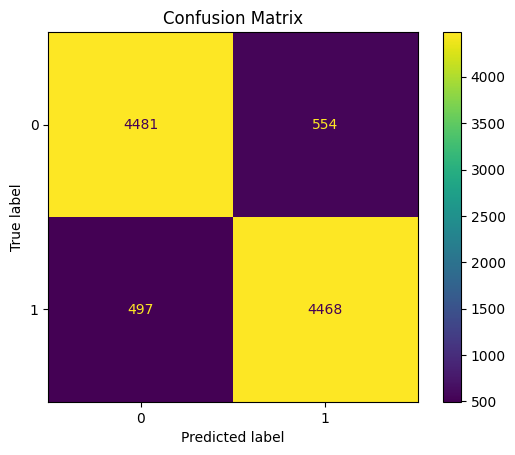

In [ ]:
# Create a ConfusionMatrixDisplay object using the estimator 'lr', test data 'bow_X_test', and true labels 'ohe_y_test'
confusion_display = ConfusionMatrixDisplay.from_estimator(lr, tfidf_X_test, ohe_y_test)

# Set the title for the confusion matrix plot
plt.title("Confusion Matrix")

# Display the confusion matrix plot
plt.show()

- **See that the number of errors has decreased significantly.**


- Let's do the same with [`SGDClassifier`](https://scikit-learn.org/stable/modules/svm.html):

In [ ]:
# Import the required class from scikit-learn's linear_model module
from sklearn.linear_model import SGDClassifier

In [ ]:
# Create an instance of the SGDClassifier class with specified parameters
# - 'loss='hinge'' specifies the hinge loss, which is used for Support Vector Machines (SVM)
# - 'random_state=42' sets a random seed for reproducibility
svm = SGDClassifier(loss='hinge', random_state=42)

# Fit (train) the SVM classifier on the bag-of-words (BoW) training data and corresponding one-hot encoded labels
svm.fit(bow_X_train, ohe_y_train.ravel())

# Print the details of the trained SVM classifier
print(svm)

SGDClassifier(random_state=42)


- **Observe the result:**

In [ ]:
# Use the trained SVM classifier 'svm' to make predictions on the BoW testing data
y_predict = svm.predict(tfidf_X_test)

# Print the accuracy score by comparing the predicted labels 'y_predict' with the true labels 'ohe_y_test'
print("SVM Score :",accuracy_score(ohe_y_test , y_predict))

# Generate a classification report to evaluate the SVM classifier's performance
# - 'ohe_y_test' represents the true labels
# - 'y_predict' represents the predicted labels
# - 'target_names' specifies the names of the target classes for labeling the report
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

SVM Score : 0.8964
              precision    recall  f1-score   support

    Positive       0.90      0.89      0.90      5035
    Negative       0.89      0.90      0.90      4965

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



- **The result was also better: 89%.**

- **Let's look at the confusion matrix:**

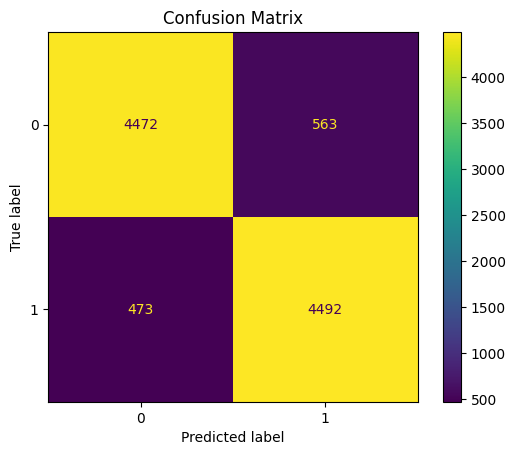

In [ ]:
# Create a ConfusionMatrixDisplay object using the estimator 'lr', test data 'bow_X_test', and true labels 'ohe_y_test'
confusion_display = ConfusionMatrixDisplay.from_estimator(svm, tfidf_X_test, ohe_y_test)

# Set the title for the confusion matrix plot
plt.title("Confusion Matrix")

# Display the confusion matrix plot
plt.show()

**FIGURE 7** - Confusion matrix for `NLP` with `TF-IDF`, `n-gram` and `SVM`

### **Conclusion**
- Thus, we saw that the use of the TF-IDF technique resulted in a model with 89% accuracy, much better than previously created models.

In [ ]:
print("Keep evolving!")

Keep evolving!
